# Imports

In [2]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

#Label engineering
import composeml as cp

#Feature engineering
import featuretools as ft

%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('float_format', '{:f}'.format)

# Datasets
Lendo todos os conjuntos de dados e um pouco de EDA. Mesmo que haja muito mais dados para trazer, por uma questão de simplicidade, foi considerado apenas três conjuntos de dados:
1. Transações
2. Itens
3. Clientes

In [3]:
transactions = pd.read_csv('./data/customer_transaction_data.csv', parse_dates=[0])
transactions.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.260000,-10.690000,0.000000
1,2012-01-02,1501,54253,1,53.430000,-13.890000,0.000000
2,2012-01-02,1501,31962,1,106.500000,-14.250000,0.000000
3,2012-01-02,1501,33647,1,67.320000,0.000000,0.000000
4,2012-01-02,1501,48199,1,71.240000,-28.140000,0.000000


In [4]:
#products
items = pd.read_csv('./data/item_data.csv')
items.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [5]:
#Customers
customers = pd.read_csv('./data/customer_demographics.csv')
customers.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


## EDA

In [6]:
print('Data é de {} até {}'.format(transactions.date.min().date(), transactions.date.max().date()))
print('Há um total de {} customers'.format(transactions.customer_id.nunique()))

Data é de 2012-01-02 até 2013-07-03
Há um total de 1582 customers


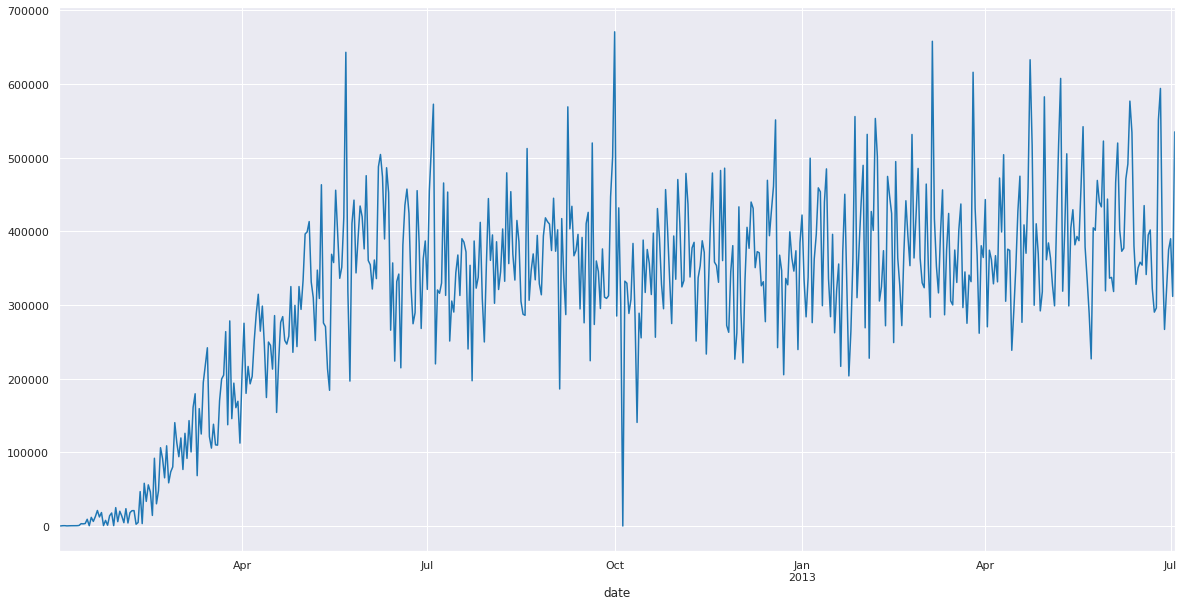

In [7]:
#Plot o total de vendas por data
transactions.groupby('date')['quantity'].sum().plot()
plt.show()

In [8]:


def plot_hist_boxplot(df, col):
    # df = df['col']

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(20,10))
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode().values[0]
    print(mode)

    sns.boxplot(df[col], ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.distplot(df[col], bins=30, kde=True, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode, color='b', linestyle='-')


    plt.legend({'Média':mean,'Mediana':median,'Moda':mode})

    ax_box.set(xlabel='')
    # ax_box.set_yticks([])
    # ax_box.set_xticks([])
    # ax_hist.set_yticks([])
    # plt.savefig("figuras/distribuicao_frequencia_0.png", dpi=300)
    plt.show()

count   1582.000000
mean      90.041087
std       56.542587
min       10.000000
25%       50.000000
50%       76.000000
75%      111.000000
max      386.000000
Name: date, dtype: float64
66


/home/bruno/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


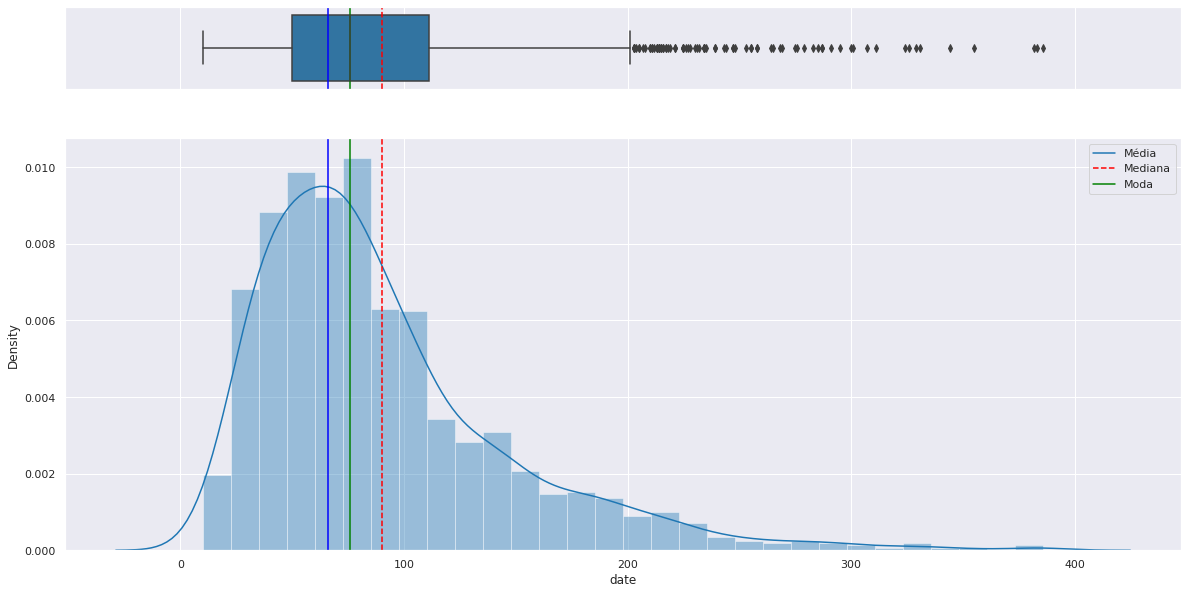

In [9]:
#Em quantos dias as pessoas fazem compras?
print(transactions.groupby(['customer_id'])['date'].nunique().describe())
plot_hist_boxplot(transactions.groupby(['customer_id'])['date'].nunique().reset_index(), 'date')

Há um total de 19 year-months únicos
count   1582.000000
mean      15.675727
std        2.251522
min        4.000000
25%       15.000000
50%       16.000000
75%       17.000000
max       19.000000
Name: year_month, dtype: float64
16


/home/bruno/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


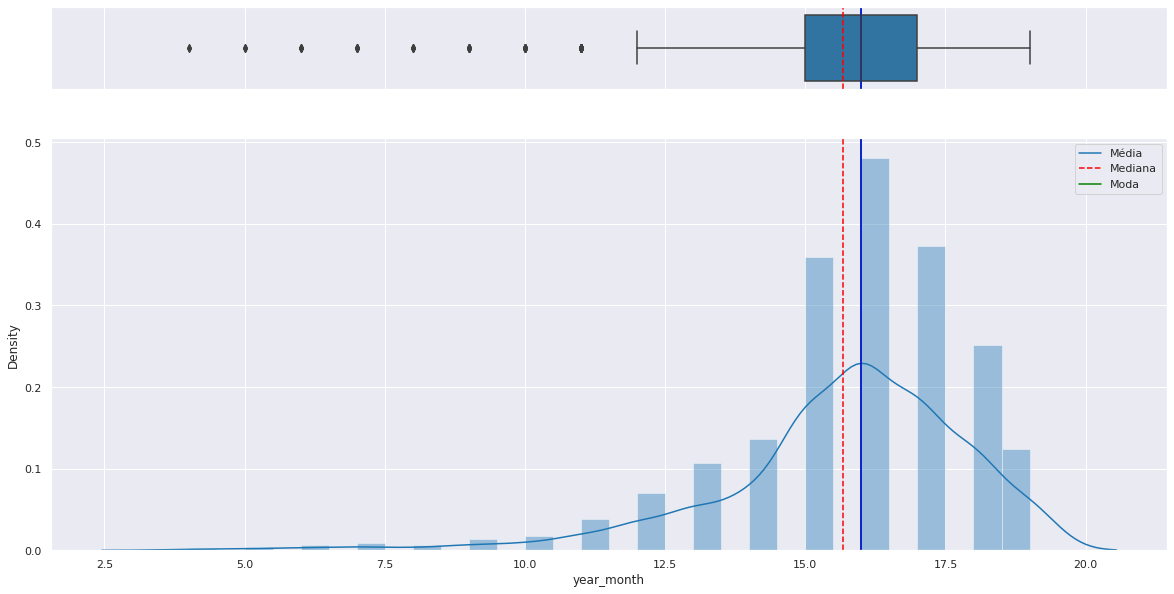

In [10]:
#Em quantos meses únicos as pessoas fazem compras?
transactions['year_month'] = pd.to_datetime(transactions['date'].apply(lambda x: x.strftime('%B-%Y')) )
print('Há um total de {} year-months únicos'.format(transactions['year_month'].nunique()))

print(transactions.groupby(['customer_id'])['year_month'].nunique().describe())
plot_hist_boxplot(transactions.groupby(['customer_id'])['year_month'].nunique().reset_index(), 'year_month')
plt.show()

count    24799.000000
mean      6978.999839
std      16192.200044
min          1.000000
25%         27.000000
50%         70.000000
75%       5814.000000
max     255639.000000
Name: quantity, dtype: float64
4


/home/bruno/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


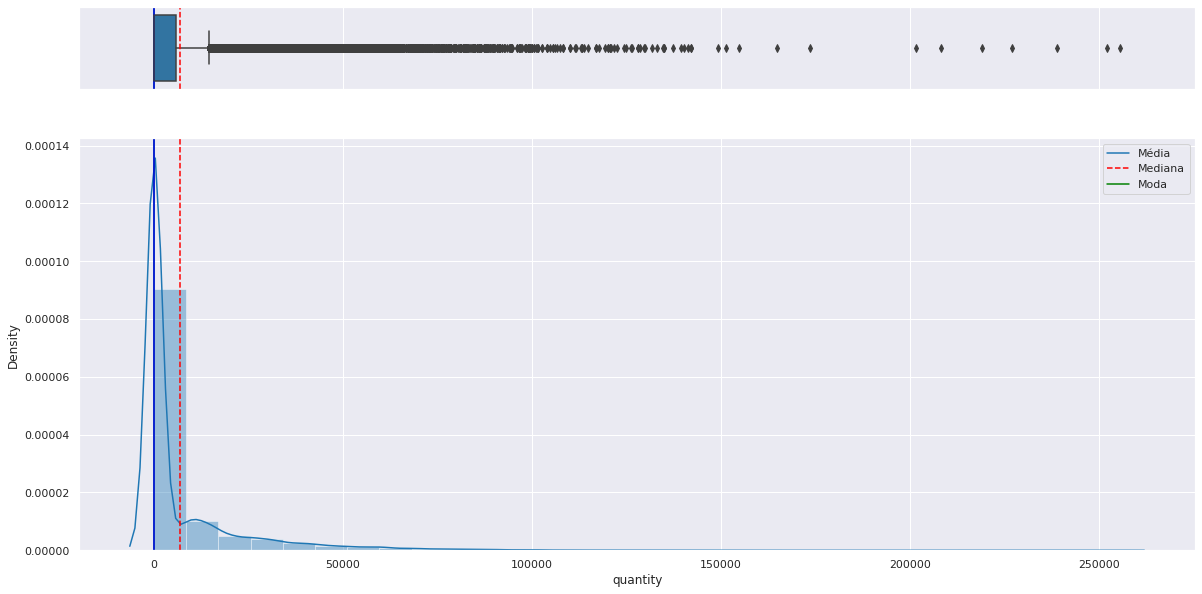

In [11]:
#Quantas transações as pessoas realizam todos os meses?
cust_transactions = transactions.groupby(['customer_id', 'year_month'])['quantity'].sum()
print(cust_transactions.describe())
plot_hist_boxplot(cust_transactions.reset_index(),'quantity')


# Feature Engineering

Nesta parte é usado 2 pacotes - `composeml` e` featuretools` para criar rótulos e recursos com janela deslizante. Como visto na seção EDA, a maioria dos clientes compra todos os meses, então não faz sentido fazer o modelo mensal. Portanto, sera considerado uma **janela semanal** nas próximas seções. Além disso, as pessoas compram em média 70 itens por mês, então, em vez de prever se um cliente comprará na próxima semana, **sera previsto se um cliente comprará muito na próxima semana.**

## Label

In [12]:
#group by id and date
transformed_data = pd.DataFrame(transactions.groupby(['customer_id', 'date'])['quantity', 'selling_price'].sum()).reset_index()
transformed_data.head()

<ipython-input-12-9a0776012f37>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transformed_data = pd.DataFrame(transactions.groupby(['customer_id', 'date'])['quantity', 'selling_price'].sum()).reset_index()


,customer_id,date,quantity,selling_price
0,1,2012-02-21,31,2603.450000
1,1,2012-03-08,13,1431.200000
2,1,2012-03-29,9,691.730000
3,1,2012-04-04,28,1913.500000
4,1,2012-04-11,17,1702.280000


count    75552.000000
mean      2290.769497
std       6036.070553
min          1.000000
25%          8.000000
50%         20.000000
75%         49.000000
max     122593.000000
Name: quantity, dtype: float64
2


/home/bruno/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


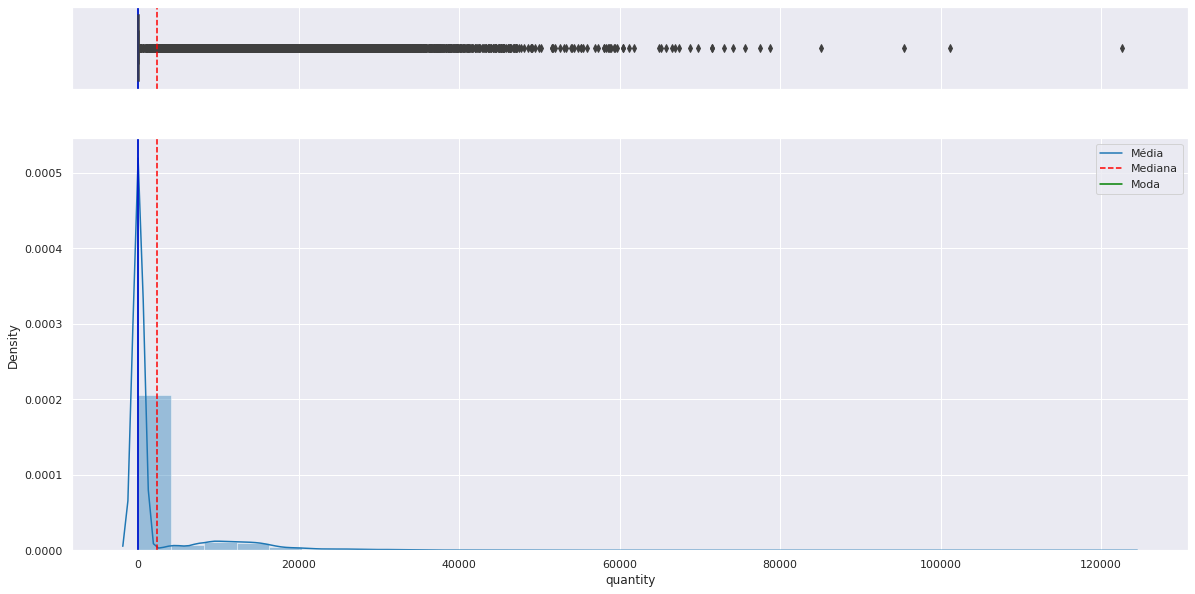

In [13]:
#Quantos itens as pessoas compram semanalmente?
weekly_purchases = transformed_data.groupby(['customer_id', pd.Grouper(key='date', freq='W-MON')])['quantity'].sum().reset_index().sort_values('date')
print(weekly_purchases['quantity'].describe())
plot_hist_boxplot(weekly_purchases,'quantity')

Com base na tabela acima, o cut-off para super clientes será de 49 itens. Aqueles que compram mais de 49 itens na próxima semana são classificados como **super clientes** e aqueles que compram menos são classificados como **clientes regulares**

In [14]:
#Function que cria a label
def is_super(df):
    total = df['quantity'].sum()
    if total > 49:
        return 1
    else:
        return 0

In [15]:
%%time
#Creating LabelMaker instance
label_maker = cp.LabelMaker(
    target_entity="customer_id", #for whom to create labels?
    time_index="date",
    labeling_function=is_super, #scoring function above
    window_size="W" #weekly window
)

#Crating labels
lt = label_maker.search(
    transactions.sort_values('date'),
    minimum_data='2012-07-02', #date where the first label will be created
    num_examples_per_instance=-1, #its flexible
    verbose=True, #will show a progress bar
    drop_empty=False #don't drop the weeks with no purchase
)

lt.head()

Elapsed: 01:16 | Remaining: 00:00 | Progress: 100%|██████████| customer_id: 1582/1582 
CPU times: user 1min 16s, sys: 638 ms, total: 1min 17s
Wall time: 1min 16s


,customer_id,time,is_super
0,1,2012-07-02,0
1,1,2012-07-08,0
2,1,2012-07-15,0
3,1,2012-07-22,0
4,1,2012-07-29,0


Os rótulos criados têm a seguinte estrutura - id do cliente, primeiro dia da semana e se uma pessoa é super cliente na próxima semana. Sera verificado quantas pessoas eram superclientes e em quantas semanas.

In [16]:
print('Há um total de {} semanas únicas e {} customers únicos'.format(lt.time.nunique(), lt.customer_id.nunique()))
print(f'\nEm média cada customer era um super cliente {int(lt.loc[lt.is_super == 1, :]["customer_id"].value_counts().describe()["mean"])} vezes' )
print(f'\nO número mediano de vezes que cada customer foi um super cliente é de {int(lt.loc[lt.is_super == 1, :]["customer_id"].value_counts().describe()["50%"])}' )


Há um total de 53 semanas únicas e 1580 customers únicos

Em média cada customer era um super cliente 11 vezes

O número mediano de vezes que cada customer foi um super cliente é de 7


Esta parece ser uma tarefa interessante, já que quase todos os clientes eram superclientes, mas em média cada cliente foi categorizado como super apenas 11 vezes em 53. Pode-se distinguir entre as semanas boas e as semanas médias? Vamos prosseguir para a engenharia de recursos, para criar o conjunto de dados apropriado para este problema.

## Features

Aqui, sera utilisado o pacote `featuretools` para criar automaticamente recursos complicados na janela deslizante de 1 semana. A primeira etapa neste processo é configurar um esquema com entidades (assim como no desenvolvimento de banco de dados)

### Creating Schema

In [17]:
#Creating entity set
es = ft.EntitySet(id="customer_data")

Cada conjunto de dados deve ter uma coluna de ID exclusiva, portanto, para transações, é necessário realizar a criação do ID e remover as duplicações. Aqui, foi considerado a combinação de ***data, id do cliente e id do item***.

In [18]:
#Concatenate the fields to create ID 
transactions['transaction_id'] = transactions.date.astype(str) + '_' + transactions.customer_id.astype(str) + '_' + transactions.item_id.astype(str)
#remove duplicates
transactions_cleaned = transactions.drop_duplicates(subset='transaction_id')
transactions_cleaned = transactions_cleaned[['transaction_id', 'date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount']]

Então pode-se iniciar a adição entidades, uma de cada vez. Elas devem ter:
1. Coluna de ID
2. Coluna de data

#### Transactions

In [19]:
es = es.entity_from_dataframe(entity_id="transactions",
                              dataframe=transactions_cleaned,
                            index="transaction_id",
                             time_index="date",
                            variable_types={"item_id": ft.variable_types.Categorical}) 

#### Items

In [20]:
es = es.entity_from_dataframe(entity_id="items",
                             dataframe=items,
                             index="item_id",
                             variable_types={"brand": ft.variable_types.Categorical})

#### Customers

In [21]:
es = es.entity_from_dataframe(entity_id='customers',
                             dataframe=customers,
                             index='customer_id',
                             variable_types={"rented": ft.variable_types.Categorical,
                                            "no_of_children": ft.variable_types.Categorical,
                                            "income_bracket": ft.variable_types.Categorical})

Depois que a entidade for adicionada, deve-se especificar as relações entre os recursos

In [22]:
new_relationship = ft.Relationship(es["items"]["item_id"],
                                      es["transactions"]["item_id"])

es = es.add_relationship(new_relationship)

new_relationship = ft.Relationship(es["customers"]["customer_id"],
                                      es["transactions"]["customer_id"])

es = es.add_relationship(new_relationship)

In [23]:
es

Entityset: customer_data
  Entities:
    transactions [Rows: 1320387, Columns: 8]
    items [Rows: 74066, Columns: 4]
    customers [Rows: 760, Columns: 7]
  Relationships:
    transactions.item_id -> items.item_id
    transactions.customer_id -> customers.customer_id

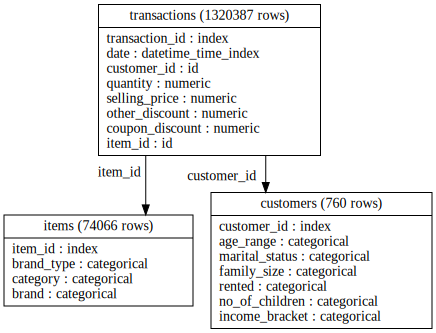

In [24]:
es.plot()

### Generating Features
Como as previsões são semanais, os recursos também estarão no nível semanal. Em particular, os recursos serão criados para janelas de:
1. 7 days
2. 14 days
3. 21 days
4. 28 days
5. 35 days
6. 42 days
7. 49 days
8. 56 days

Este loop for iterará sobre os tamanhos de janela e criará automaticamente recursos para o modelo.

In [25]:
day_windows = [7, 14, 21, 28, 35, 42, 49, 56] #all the window frames
feature_dfs = [] #to populate with features
feature_encodings = []

for w in day_windows:
    feature_matrix, features = ft.dfs(target_entity="customers", 
                                  cutoff_time=lt, #the labels created earlier
                                  training_window=ft.Timedelta(f"{str(w)} days"), #Window populated in the for loop
                                  ignore_variables = {'customers': [c for c in customers.columns[1:]]}, #ignore demographic variables
                                  max_features = 20, #number of features to generate per window
                                  entityset=es, #schema created before
                                  verbose=False
                                 )
    
    encoded, wfeatures_encoded = ft.encode_features(feature_matrix, features) #outputs the dataframe and names of generated features
    feature_matrix.columns = [f'D{str(w)}_' + c for c in feature_matrix.columns] #renaming columns to merge 
    feature_matrix = feature_matrix[[c for c in feature_matrix.columns if 'is_super' not in c]] #excluding the label column to not get duplicated
    feature_dfs.append(encoded) #populating the list above
    feature_encodings.append(features) #saving for later use

/home/bruno/.local/lib/python3.8/site-packages/featuretools/entityset/entityset.py:1019: UserWarning: Using training_window but last_time_index is not set on entity transactions
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/featuretools/entityset/entityset.py:1019: UserWarning: Using training_window but last_time_index is not set on entity transactions
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/featuretools/entityset/entityset.py:1019: UserWarning: Using training_window but last_time_index is not set on entity transactions
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/featuretools/entityset/entityset.py:1019: UserWarning: Using training_window but last_time_index is not set on entity transactions
  warnings.warn(
/home/bruno/.local/lib/python3.8/site-packages/featuretools/entityset/entityset.py:1019: UserWarning: Using training_window but last_time_index is not set on entity transactions
  warnings.warn(
/home/bruno/.local/lib/py

In [28]:
#Joining all features
all_features = pd.concat(feature_dfs, axis=1) 

#Adding label column
all_features['is_super'] = lt['is_super'].values

In [32]:
all_features.head()

,COUNT(transactions),MAX(transactions.coupon_discount),MAX(transactions.other_discount),MAX(transactions.quantity),MAX(transactions.selling_price),MEAN(transactions.coupon_discount),MEAN(transactions.other_discount),MEAN(transactions.quantity),MEAN(transactions.selling_price),MIN(transactions.coupon_discount),...,MODE(transactions.item_id) = 30851.0,MODE(transactions.item_id) = 49004.0,MODE(transactions.item_id) is unknown,NUM_UNIQUE(transactions.item_id),SKEW(transactions.coupon_discount),SKEW(transactions.other_discount),SKEW(transactions.quantity),SKEW(transactions.selling_price),STD(transactions.coupon_discount),is_super
customer_id,,,,,,,,,,,,,,,,,,,,,
1,23.000000,0.000000,0.000000,2.000000,238.300000,-2.322609,-16.028696,1.086957,81.213043,-26.710000,...,False,False,True,129.000000,-9.220279,-5.720998,3.861156,2.299973,7.827813,0
1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,109.000000,-9.748455,-5.303531,3.792618,2.513127,8.236005,0
1,26.000000,0.000000,0.000000,3.000000,145.690000,-0.548077,-14.892308,1.269231,85.940000,-14.250000,...,False,False,True,103.000000,-9.319856,-5.463633,3.624902,2.754597,8.441979,0
1,18.000000,0.000000,0.000000,2.000000,195.910000,0.000000,-17.335000,1.055556,78.561111,0.000000,...,False,False,True,94.000000,-9.134769,-5.450776,3.751392,2.683371,8.609522,0
1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,94.000000,-9.134769,-5.450776,3.751392,2.683371,8.609522,0


In [33]:
features[5]

<Feature: MEAN(transactions.coupon_discount)>

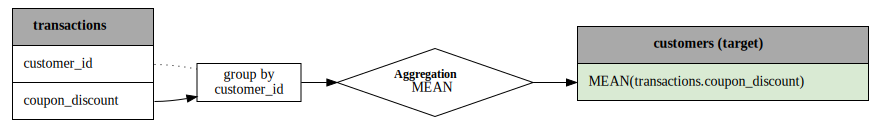

In [34]:
# interpert the result of resources
ft.graph_feature(features[5])

In [35]:
ft.describe_feature(features[5])

'The average of the "coupon_discount" of all instances of "transactions" for each "customer_id" in "customers".'

# Deployment

In [50]:
import os
if not os.path.exists('./outputs'):
    os.makedirs('./outputs')

In [51]:
#Saving the data for training
all_features.to_csv('./outputs/generated_data.csv')

In [52]:
#Saving the features for later use
ft.save_features(feature_encodings[0], './outputs/fetures.json')
    